In [2]:
# Import the libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the data: https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london
gdf = gpd.read_file('london_borough_gis.shp')
income_data = pd.read_csv('income-of-tax-payers_cleaned.csv')

ERROR 1: PROJ: proj_create_from_database: Open of /home/cne/anaconda3/share/proj failed


In [4]:
gdf.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [5]:
income_data.head()

,area_id,area_id_name,year,no_of_individual,mean_income_pound,median_income_pound
0,E09000001,City of London,1999,"10,000","109,800","40,400"
1,E09000002,Barking and Dagenham,1999,"62,000","16,200","15,100"
2,E09000003,Barnet,1999,"161,000","26,800","18,700"
3,E09000004,Bexley,1999,"105,000","20,500","17,200"
4,E09000005,Brent,1999,"122,000","20,000","16,500"


In [6]:
# Rename the 'GSS_CODE' column to 'area_id' in the GeoDataFrame
# Keep only the 'area_id' and 'geometry' columns
gdf.rename(columns={'GSS_CODE':'area_id'}, inplace=True)
gdf = gdf[['area_id', 'geometry']]

# Filter out only the year 2015 from the income_data DataFrame
income_data = income_data[income_data['year'] == 2015]

# Keep only the 'area_id', 'area_id_name', 'mean_income_pound', and 'median_income_pound' columns
income_data = income_data[['area_id', 'area_id_name', 'mean_income_pound', 'median_income_pound']]

# Making sure 'area_id' is a string in both DataFrames if it's not already
gdf['area_id'] = gdf['area_id'].astype(str)
income_data['area_id'] = income_data['area_id'].astype(str)

# Merge the two DataFrames
merged_df = gdf.merge(income_data, on='area_id')

In [7]:
merged_df.head()

,area_id,geometry,area_id_name,mean_income_pound,median_income_pound
0,E09000021,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston-upon-Thames,"45,800","30,300"
1,E09000008,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,"34,200","26,300"
2,E09000006,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,"43,500","29,800"
3,E09000018,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,"38,400","25,000"
4,E09000009,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,"37,000","24,900"


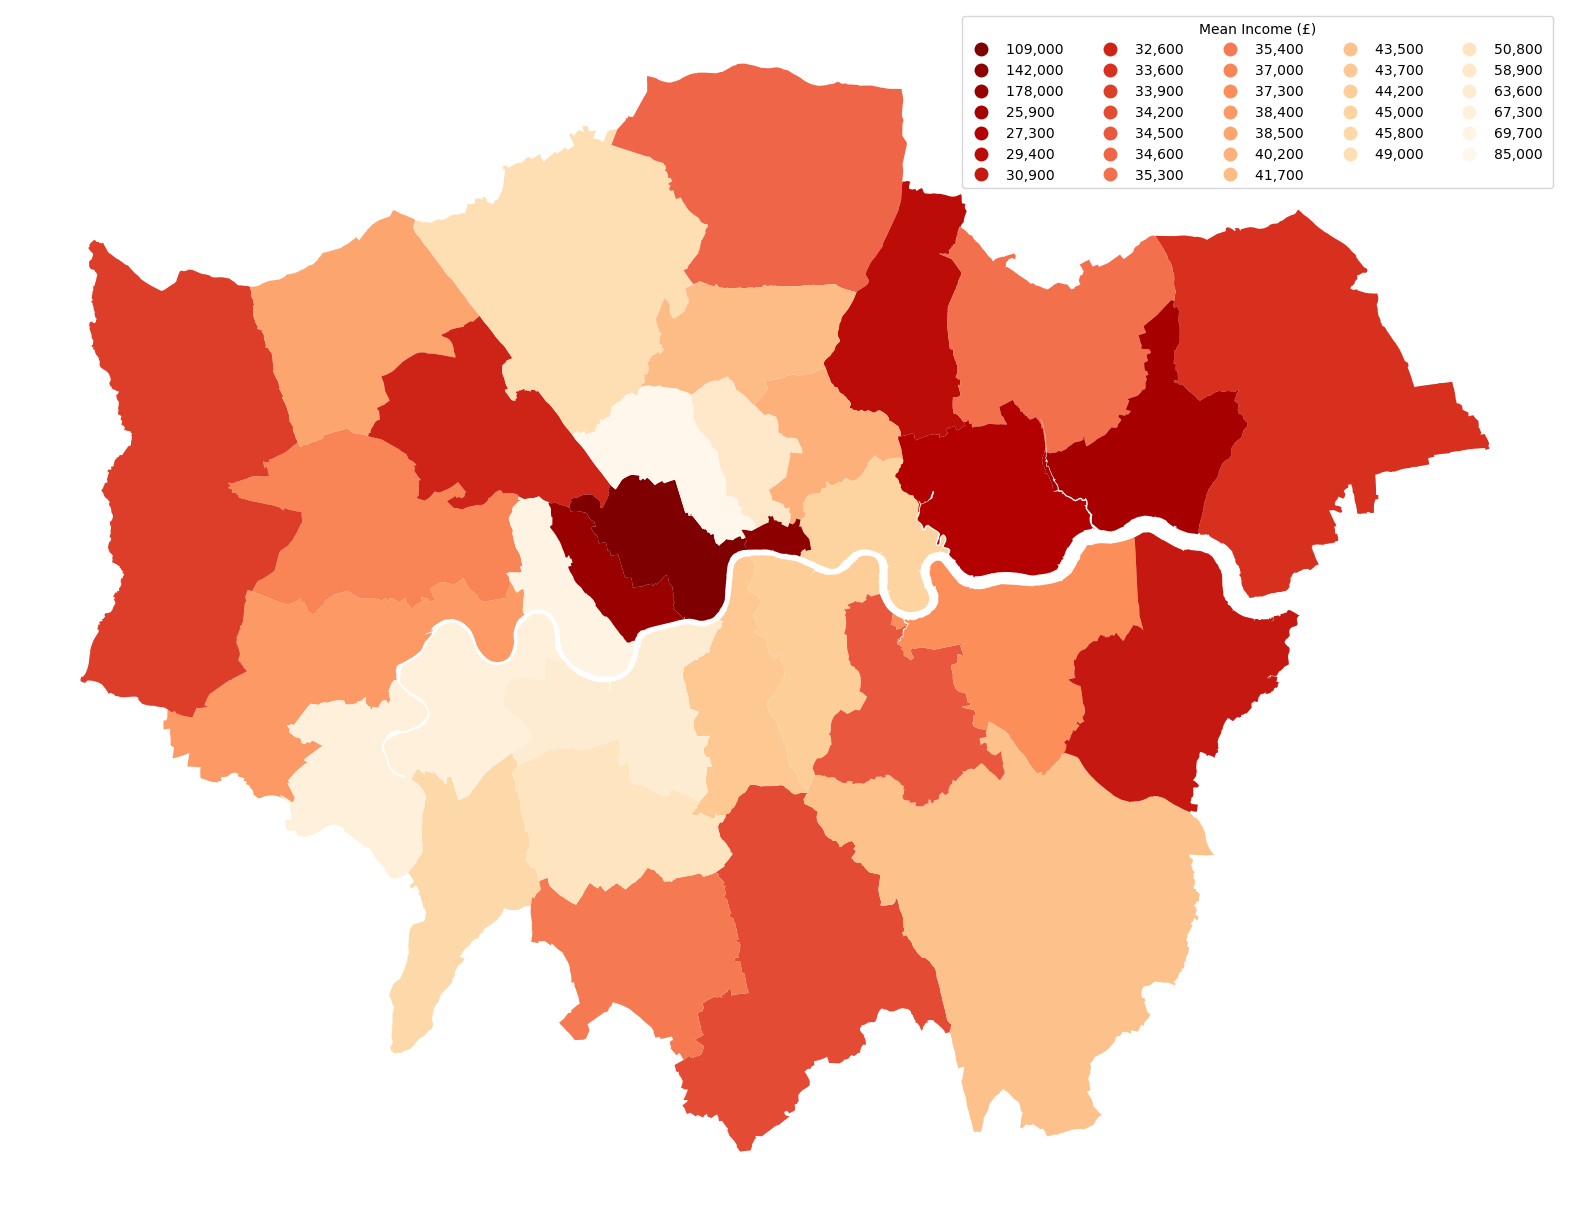

In [8]:
# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
merged_df.plot(column='mean_income_pound', ax=ax, legend=True, cmap='OrRd_r',
               legend_kwds={'title': "Mean Income (£)", 'ncol':5})
ax.set_axis_off()
plt.show()

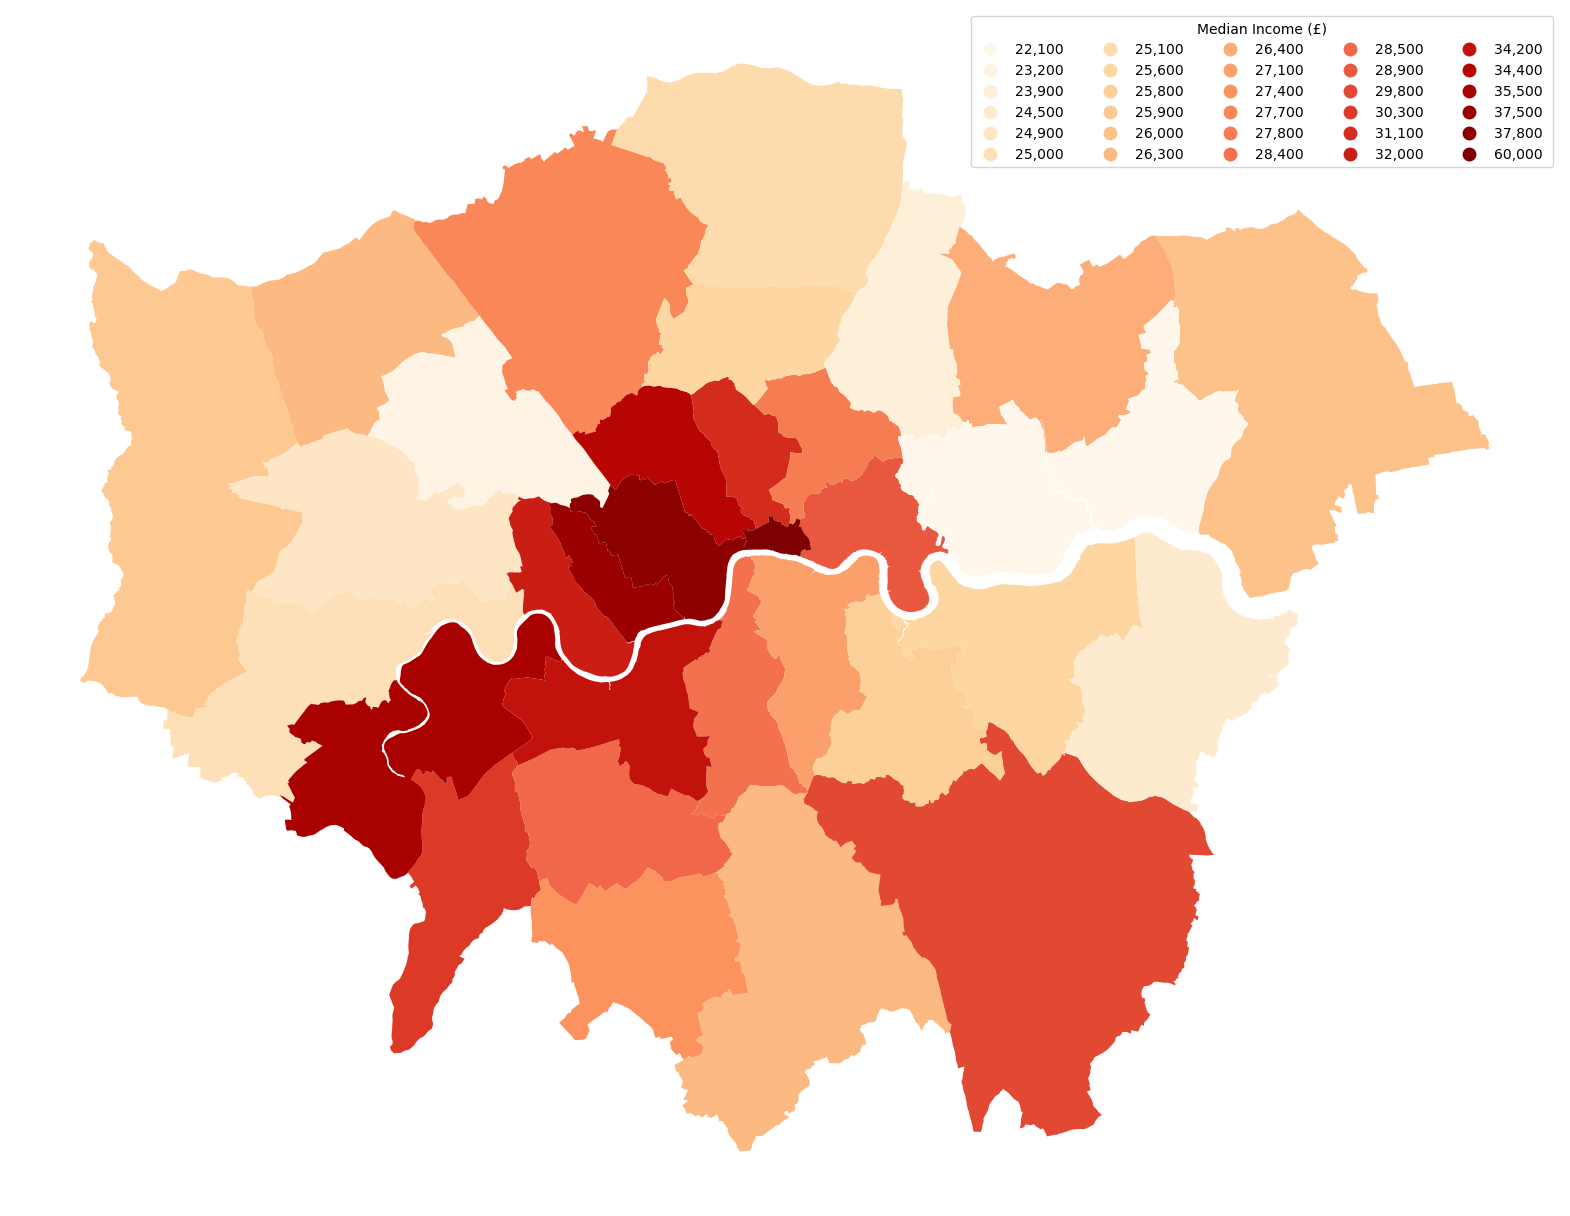

In [9]:
# Create the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
merged_df.plot(column='median_income_pound', ax=ax, legend=True, cmap='OrRd'
               , legend_kwds={'title': "Median Income (£)", 'ncol':5})
ax.set_axis_off()
plt.show()

In [10]:
# Read borough
gdf_borough = gpd.read_file('london_borough_gis.shp')
# gdf_osward = gpd.read_file("london_osward_gis.shp")
# gdf_osward_city = gpd.read_file("london_osward_city_gis.shp")
tesco_data_borough = pd.read_csv("year_borough_grocery.csv")
# tesco_data_osward = pd.read_csv("year_osward_grocery.csv")

In [11]:
tesco_data_borough.head()

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E09000001,323.174750,35.0,150.0,250.0,400.0,1000.0,323.692596,1.001520,98.842963,...,103883,6687.0,3697.0,2990.0,1018.0,4349.0,1320.0,43.910124,2.90,2305.862069
1,E09000002,421.304125,32.5,165.6,300.0,500.0,1500.0,597.994271,0.828993,122.341294,...,397127,203101.0,99442.0,103659.0,60281.0,123180.0,19640.0,33.017321,36.09,5627.625381
2,E09000003,407.170491,40.0,180.0,320.0,500.0,1160.0,443.644324,0.171615,114.933771,...,4131210,378778.0,186357.0,192421.0,88754.0,237036.0,52988.0,37.195582,86.76,4365.813739
3,E09000004,359.544126,30.0,144.0,255.0,450.0,1000.0,476.576945,0.819748,106.446426,...,380177,242387.0,116814.0,125573.0,56028.0,146237.0,40122.0,38.880749,60.58,4001.105976
4,E09000005,434.324141,40.0,175.0,325.0,500.0,1500.0,616.087316,0.354492,128.930369,...,2541113,323443.0,163939.0,159504.0,75033.0,211885.0,36525.0,35.766416,43.28,7473.267098


In [12]:
gdf_borough.rename(columns={'GSS_CODE':'area_id'}, inplace=True)
gdf_borough.rename(columns={'NAME':'area_id_name'}, inplace=True)
gdf_borough.head()

,area_id_name,area_id,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [13]:
gdf_borough = gdf_borough[['area_id', 'geometry', 'area_id_name']]
gdf_borough['area_id'] = gdf_borough['area_id'].astype(str)
tesco_data_borough['area_id'] = tesco_data_borough['area_id'].astype(str)

# Merge the two DataFrames
tesco_gis_merged_df = gdf_borough.merge(tesco_data_borough, on='area_id')
tesco_gis_merged_df.head()

,area_id,geometry,area_id_name,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E09000021,"POLYGON ((516401.600 160201.800, 516407.300 16...",Kingston upon Thames,297.379174,30.0,125.0,220.0,400.0,1000.0,318.095793,...,145265,171609.0,84301.0,87308.0,37534.0,111139.0,22936.0,37.072461,37.26,4605.716586
1,E09000008,"POLYGON ((535009.200 159504.700, 535005.500 15...",Croydon,353.636123,30.0,150.0,250.0,450.0,1000.0,425.267620,...,824237,380070.0,184305.0,195765.0,93166.0,237511.0,49393.0,36.896435,86.57,4390.319972
2,E09000006,"POLYGON ((540373.600 157530.400, 540361.200 15...",Bromley,319.336273,30.0,135.0,250.0,400.0,1000.0,347.979651,...,734232,325303.0,156274.0,169029.0,72176.0,196323.0,56804.0,39.853429,150.14,2166.664447
3,E09000018,"POLYGON ((521975.800 178100.000, 521967.700 17...",Hounslow,336.922944,32.5,150.0,250.0,450.0,1000.0,359.841786,...,365032,266412.0,134797.0,131615.0,62349.0,173737.0,30326.0,35.741397,55.95,4761.608579
4,E09000009,"POLYGON ((510253.500 182881.600, 510249.900 18...",Ealing,358.569245,35.0,154.0,275.0,454.0,1000.0,373.797449,...,1824981,344285.0,172747.0,171538.0,81217.0,222669.0,40399.0,36.143460,55.55,6197.749775


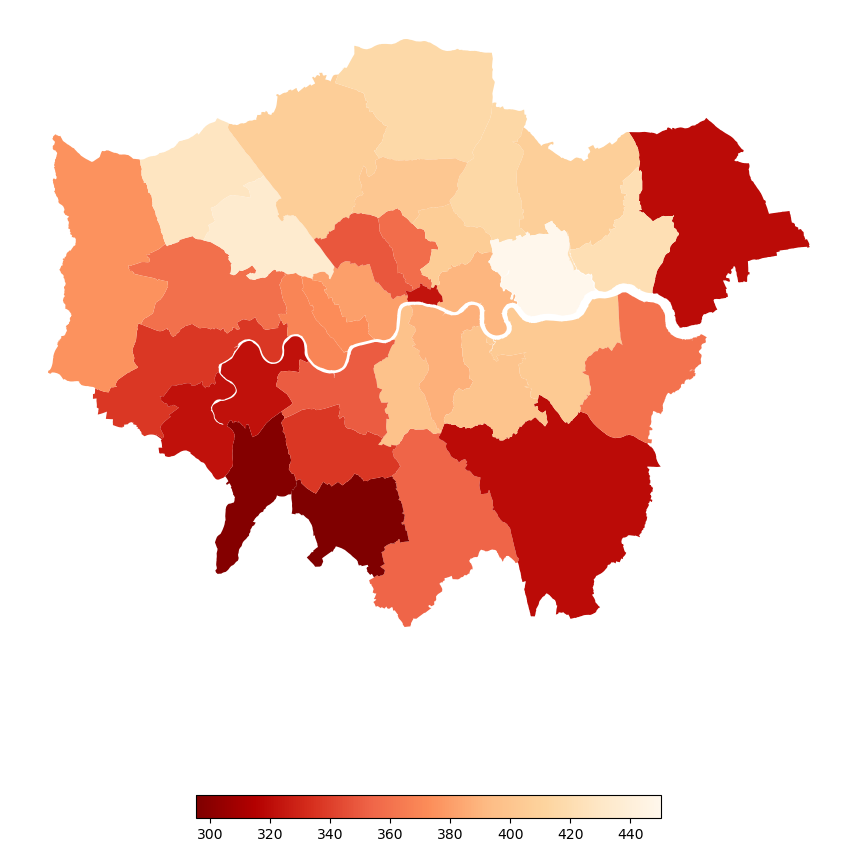

In [23]:
fig, ax = plt.subplots(1, figsize=(12, 12))
tesco_gis_merged_df.plot(column='weight', ax=ax,
                         legend=True,
                         cmap='OrRd_r',
                         legend_kwds={'shrink': 0.5,
                                      'aspect': 20,
                                      'orientation': 'horizontal'})
ax.set_axis_off()
# ax.set_title("Weight By The Average Food Product (in grams)", fontsize=25)

# colorbar = ax.get_figure().get_axes()[1]
# colorbar.tick_params(labelsize=10)
# colorbar.yaxis.label.set_size(22)

plt.show()

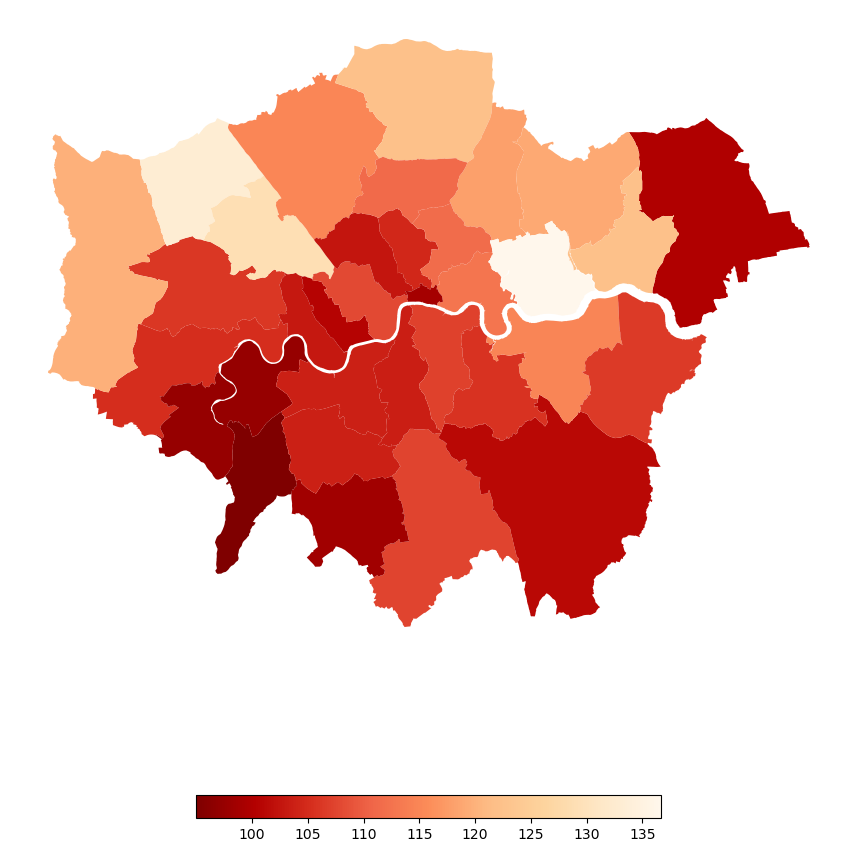

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
tesco_gis_merged_df.plot(column='volume', ax=ax,
                         legend=True,
                         cmap='OrRd_r',
                            legend_kwds={'shrink': 0.5,
                                        'aspect': 20,
                                        'orientation': 'horizontal'})
ax.set_axis_off()
# ax.set_title("Volume of Average Drink Product (in litre)")
plt.show()

KeyError: ''

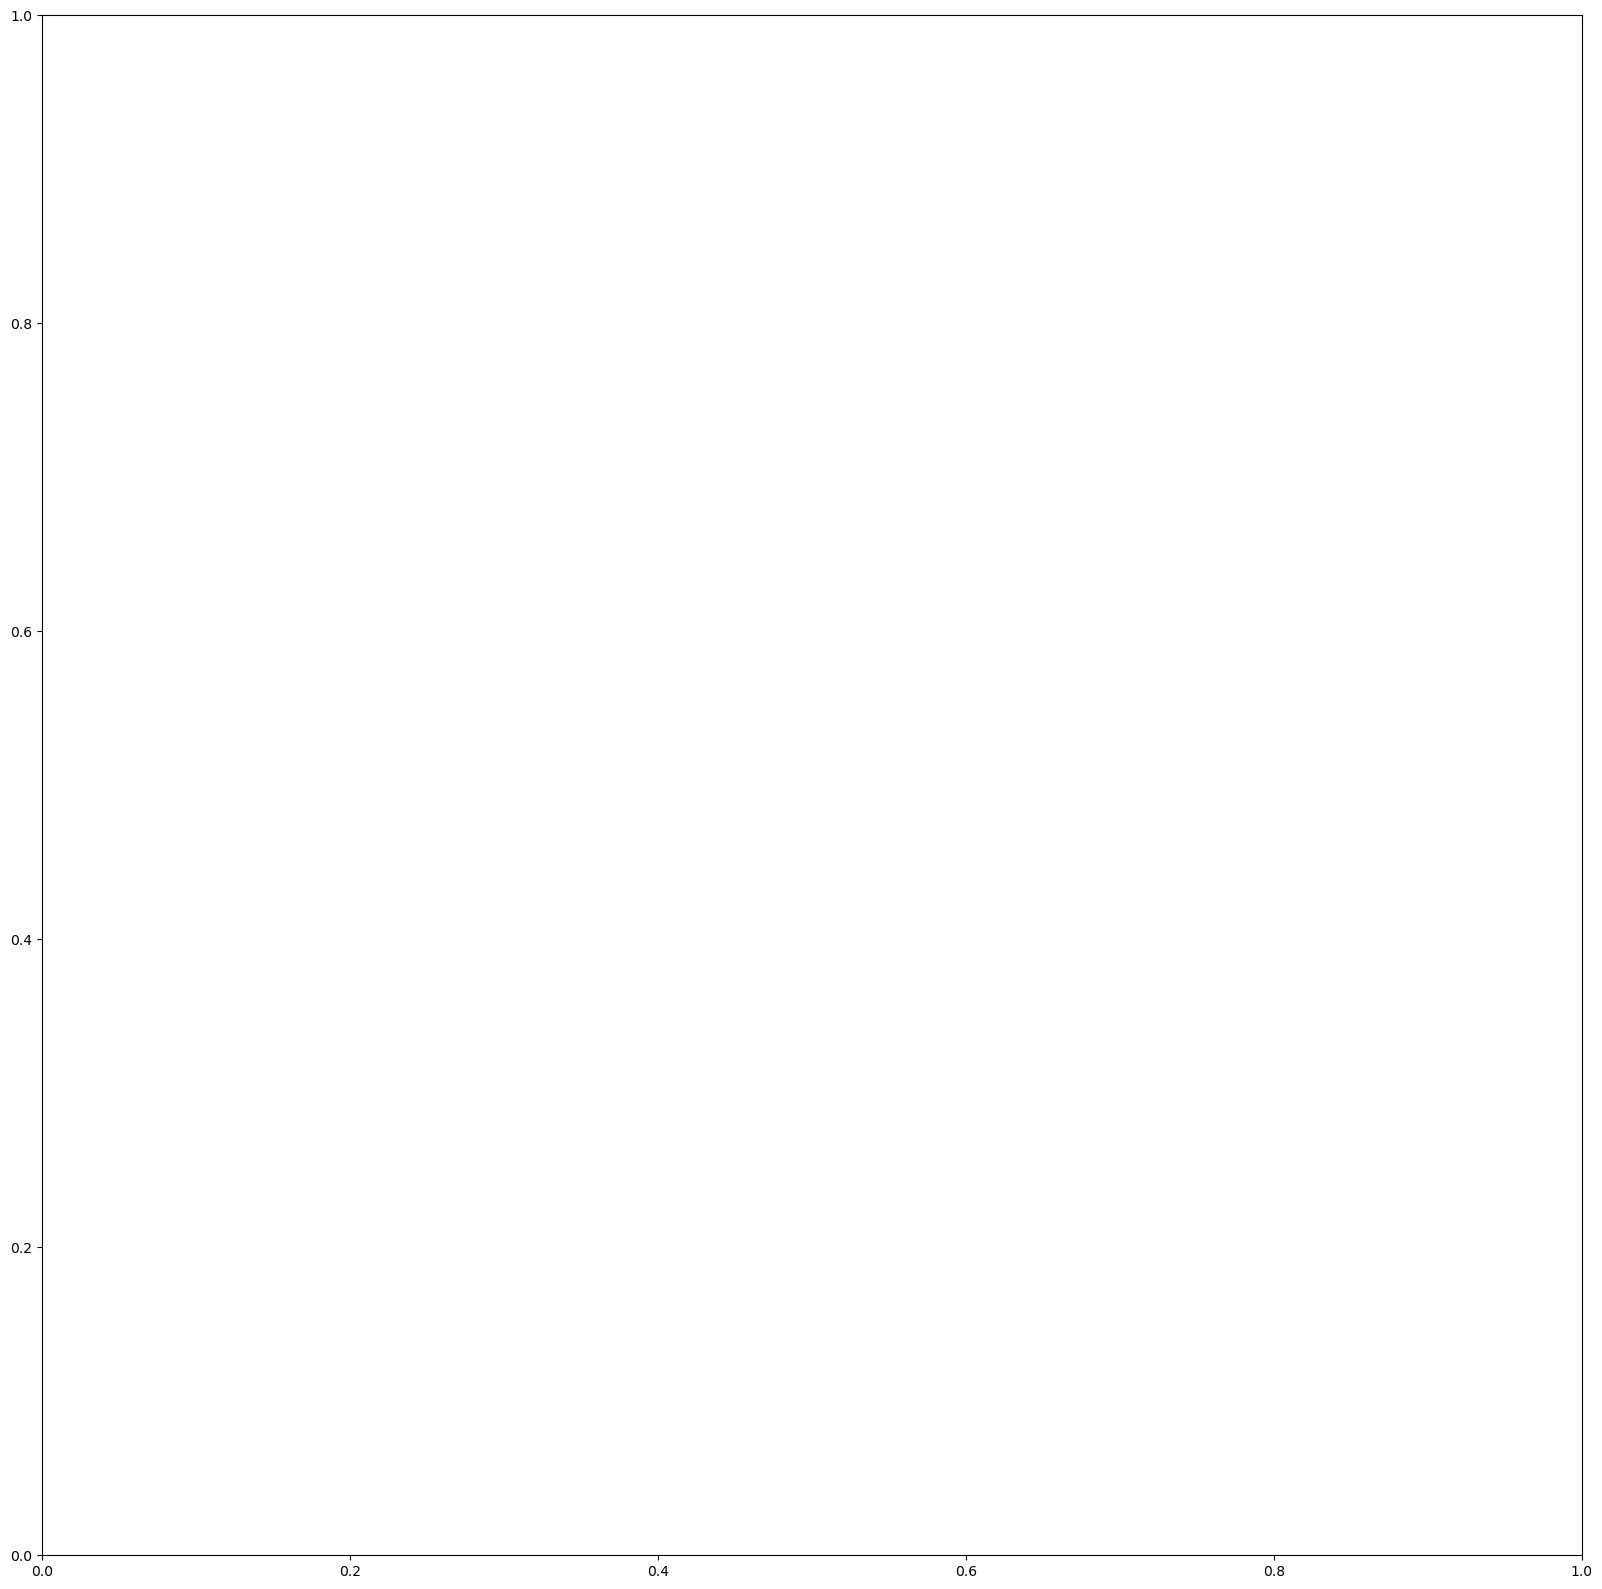

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
tesco_gis_merged_df.plot(column='', ax=ax, legend=True, cmap='OrRd_r')
ax.set_axis_off()
ax.set_title("Tesco Grocery Volume by Borough")
plt.show()